In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller unit root test.
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error  , mean_absolute_percentage_error
import itertools

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [38]:
# Importing the dataset

df = pd.read_csv(r"D:\Projects\Demand Estimation\Electricity Consumption.csv")

In [39]:
# checking for missing values

df.isnull().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [4]:
# checking data types

df.dtypes

DATE                             object
Electricty_Consumption_in_TW    float64
dtype: object

In [5]:
# converting data type of date column from object to datetime

df['Date'] = pd.to_datetime(df['DATE'] , format  = '%m/%d/%Y')

# setting date as index

df.set_index('Date' , drop = True , inplace= True)

df.drop(columns=['DATE'] , inplace= True)

# EDA  ( Exploratory Data Analysis )

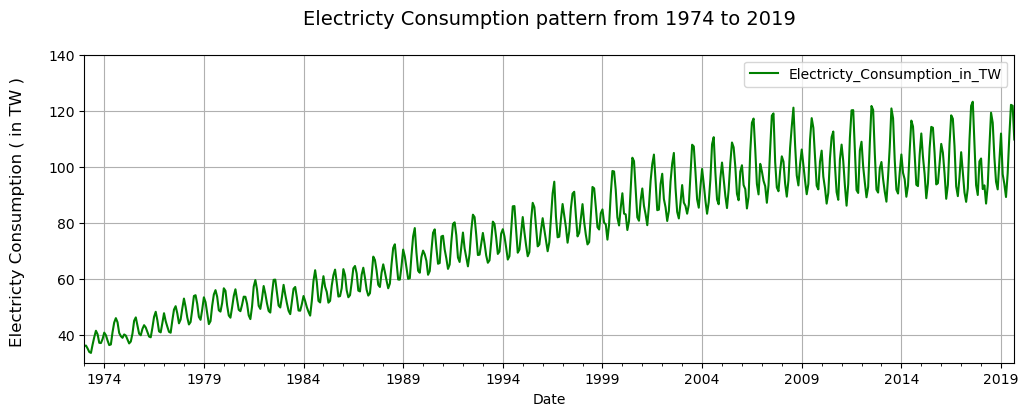

In [6]:
# Electricty Consumption pattern from 1974 to 2019

df.plot(figsize = (12,4), ylim = (30,140) , color = 'g')
plt.title('Electricty Consumption pattern from 1974 to 2019\n' , fontsize = 14)
plt.ylabel("Electricty Consumption ( in TW ) \n" , fontsize = 12 )
plt.grid()
plt.show()

# Clearly we can see that there is an UPWARD TREND in the data

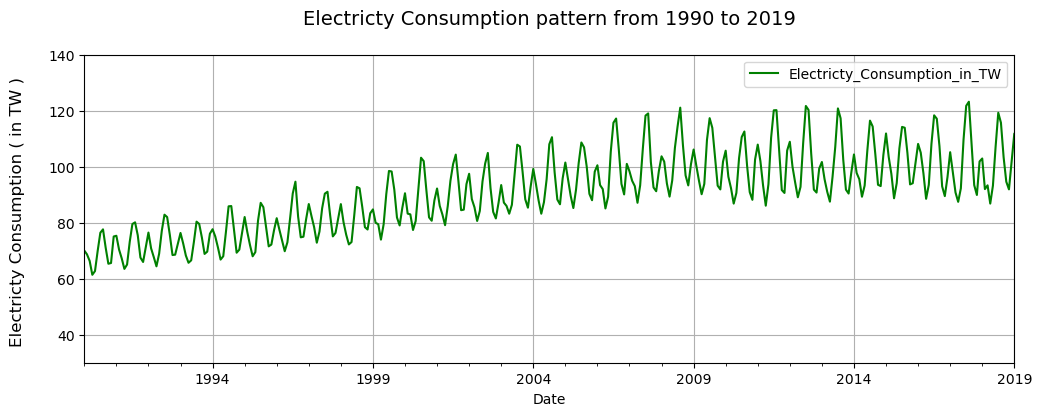

In [7]:
# Electricty Consumption pattern from 1990 to 2019

df.plot(figsize = (12,4) ,  xlim = ['1990-01-01' , '2019-01-01'] , ylim = (30,140) ,  color = 'g')
plt.title('Electricty Consumption pattern from 1990 to 2019\n' , fontsize = 14)
plt.ylabel("Electricty Consumption ( in TW ) \n" , fontsize = 12 )
plt.grid()
plt.show()

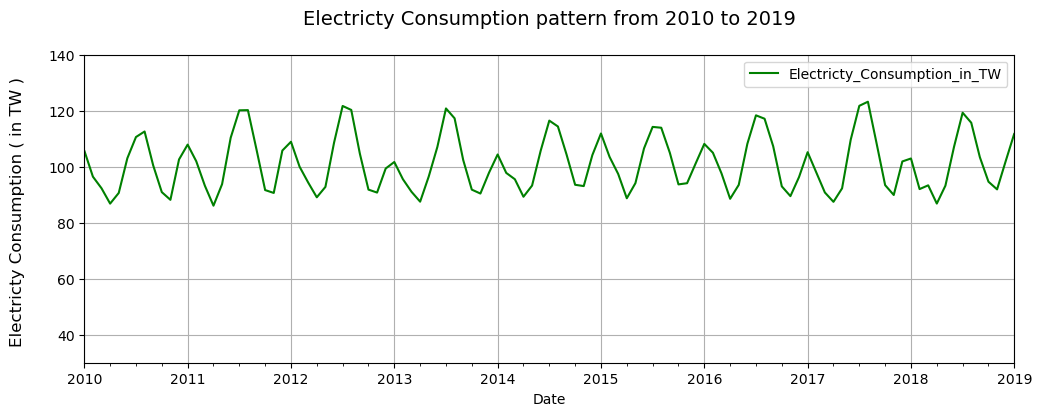

In [8]:
# Electricty Consumption pattern from 2010 to 2019

df.plot(figsize = (12,4) ,  xlim = ['2010-01-01' , '2019-01-01'] , ylim = (30,140), color = 'g')
plt.title('Electricty Consumption pattern from 2010 to 2019\n' , fontsize = 14)
plt.ylabel("Electricty Consumption ( in TW ) \n" , fontsize = 12 )
plt.grid()
plt.show()

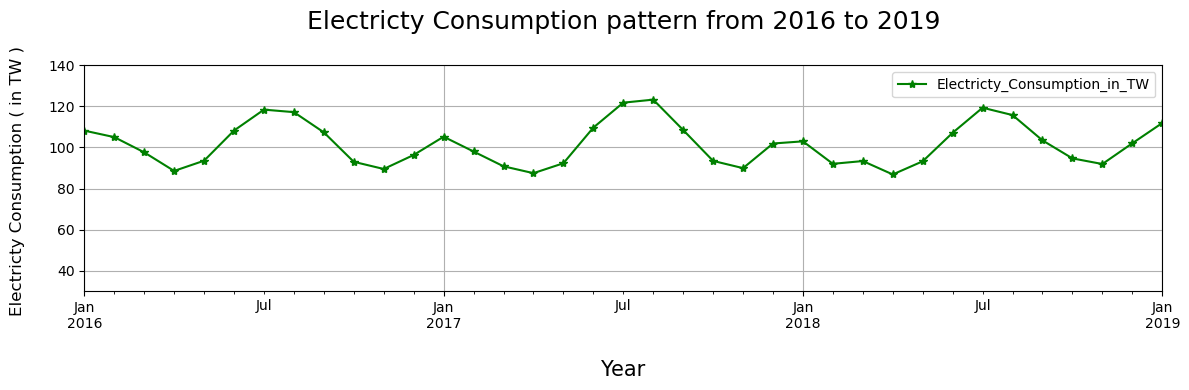

In [9]:
# Electricty Consumption pattern from 2016 to 2019

df.plot(figsize = (12,4) ,  xlim = ['2016-01-01' , '2019-01-01'] , ylim = (30,140) ,  color = 'g' , marker = '*')
plt.title('Electricty Consumption pattern from 2016 to 2019\n' , fontsize  = 18)
plt.ylabel("Electricty Consumption ( in TW ) \n" , fontsize = 12 )
plt.xlabel('\nYear' , fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show()

# Clearly we can see that there is some SEASONALITY (Regular and Predictable patterns/fluctuations) in our data 


## TIME RESAMPLING

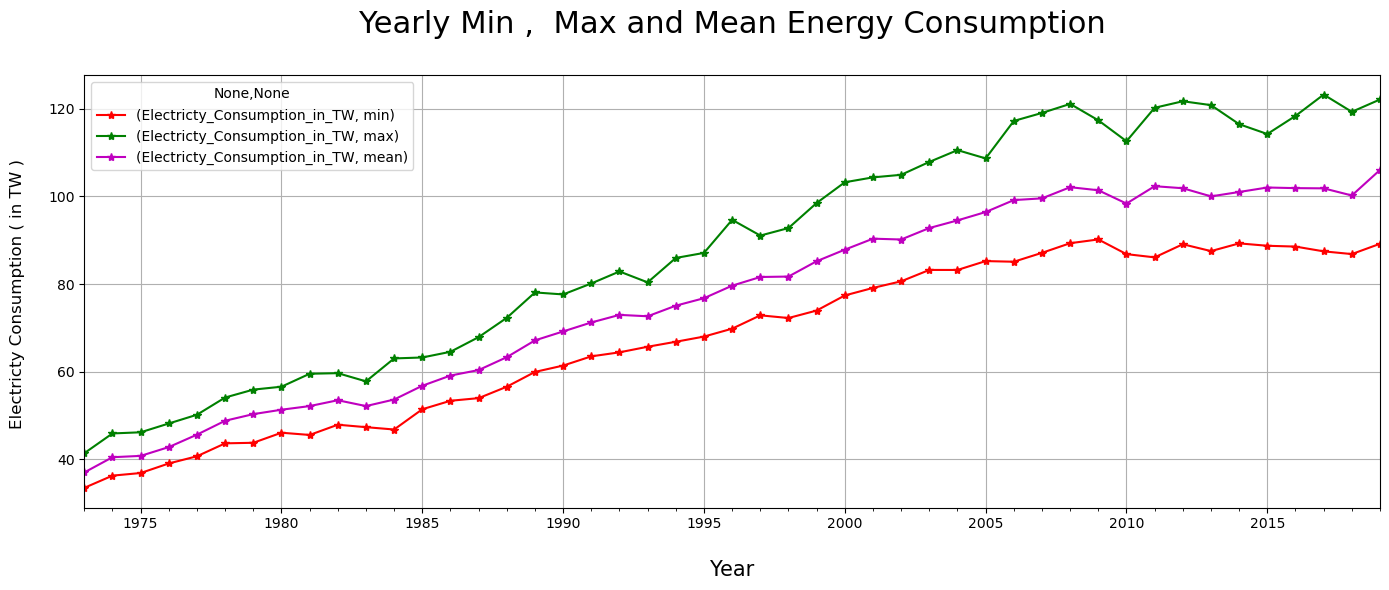

In [10]:
df.resample(rule = 'A').agg(['min' , 'max', 'mean']).plot(color = ['r', 'g' , 'm']  , figsize  = (14,6) , marker = '*')
plt.title("Yearly Min ,  Max and Mean Energy Consumption\n" , fontsize = 22 )
plt.ylabel("Electricty Consumption ( in TW ) \n" , fontsize = 12 )
plt.xlabel('\nYear' , fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show()

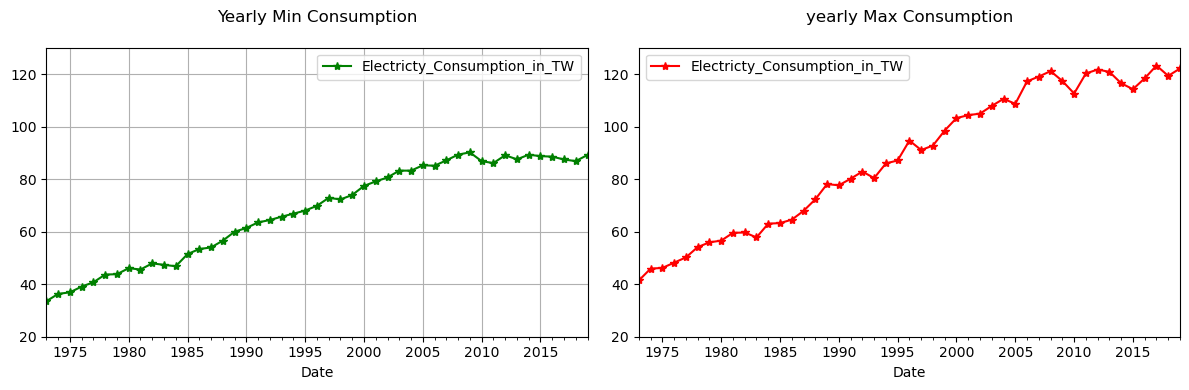

In [11]:
figure,axis=plt.subplots(1,2 , figsize = (12,4))
df.resample(rule = 'y').min().plot(color = 'g' , ax = axis[0] , title  = 'Yearly Min Consumption\n' , grid  = True ,
                                   ylim = (20,130) ,  marker = '*' )
df.resample(rule = 'y').max().plot(color = 'r' , ax = axis[1] , title  = 'yearly Max Consumption\n' , grid  = True, 
                                   ylim = (20,130) ,  marker = '*')
plt.tight_layout()
plt.grid()
plt.show()

### Exploring the effect of using Rolling Mean on the data


In [12]:
df1 = df.copy()

In [13]:
df1['no_rolmean'] = df1['Electricty_Consumption_in_TW']
df1['rolmean5']  = df1['Electricty_Consumption_in_TW'].rolling(window  =  5 , min_periods= 1).mean()
df1['rolmean10'] = df1['Electricty_Consumption_in_TW'].rolling(window  = 10 , min_periods= 1).mean()
df1['rolmean20'] = df1['Electricty_Consumption_in_TW'].rolling(window  = 20 , min_periods= 1).mean()
df1['rolmean40'] = df1['Electricty_Consumption_in_TW'].rolling(window  = 40 , min_periods= 1).mean()

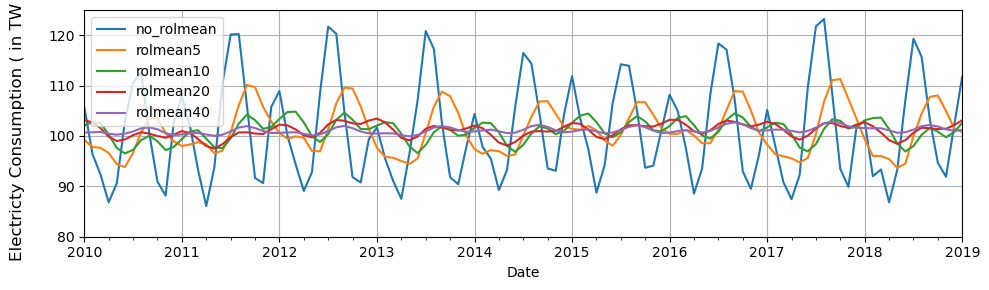

In [14]:
df1[['no_rolmean' , 'rolmean5' , 'rolmean10', 'rolmean20','rolmean40']].plot(figsize  = (10,3), 
xlim = ['2010-01-01' , '2019-01-01'] , ylim = (80,125))
plt.ylabel("Electricty Consumption ( in TW ) \n" , fontsize = 12 )
plt.tight_layout()
plt.grid()
plt.show()

## we can see that using rolling our values have smoothened a little bit

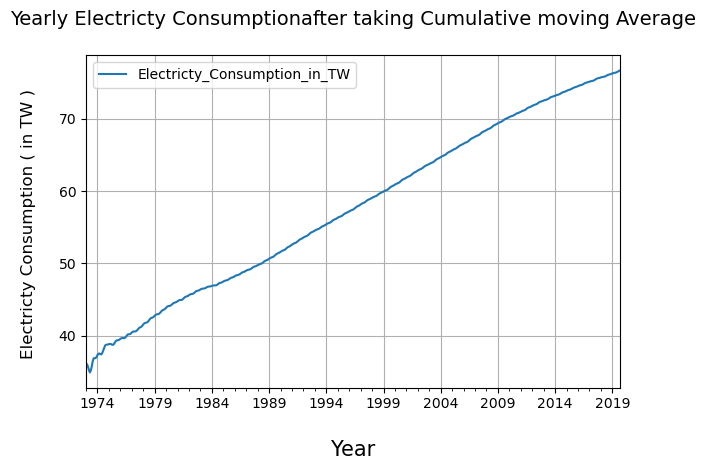

In [15]:
# Expanding 
# Cumulative moving Average

df.expanding().mean().plot()
plt.title("Yearly Electricty Consumptionafter taking Cumulative moving Average\n", fontsize = 14 )
plt.ylabel("Electricty Consumption ( in TW ) \n" , fontsize = 12 )
plt.xlabel('\nYear' , fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show()

# Stataionarity of the Data

In [16]:
# let the thresold be 0.05

def adfuller_test(df):
    result = pd.Series(adfuller(df)[:4] , index = ['Test Statistic' , 'p-value' , 'Lags Used' , 'Number of Observations'])
    if result[1] > 0.05 :
        print('p-value -' , result[1])
        print('p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.')
    else :
        print('p-value -' , result[1])
        print('p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.')

In [17]:
adfuller_test(df)

p-value - 0.4103281604468657
p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.


In [18]:
adfuller_test(df.diff().dropna())

p-value - 3.3013438021514486e-12
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


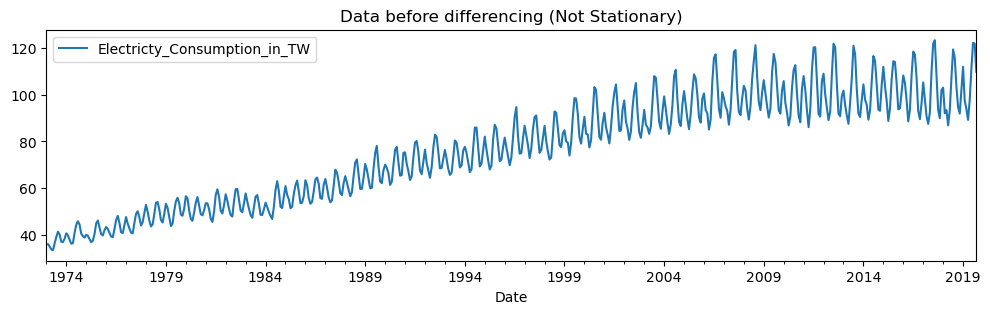

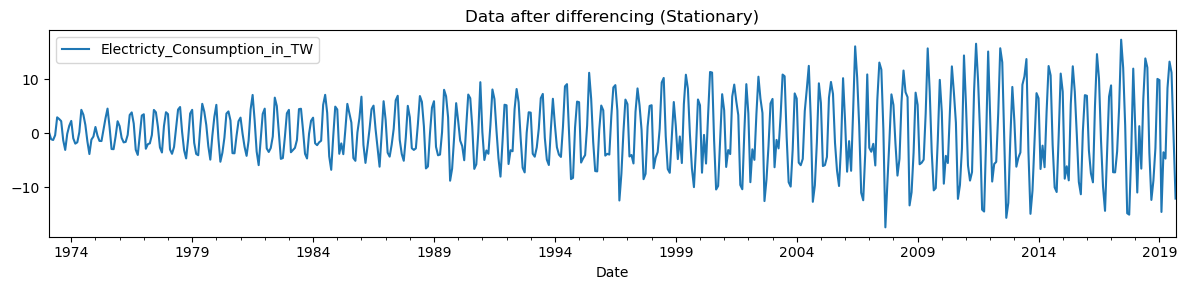

In [19]:
# Visualizing the difference in Stationary data and not-stationary data

df.plot(figsize = (12,3) , title = 'Data before differencing (Not Stationary)')
df.diff().dropna().plot(figsize = (12,3), title = 'Data after differencing (Stationary)' )
plt.tight_layout()
plt.show()

# ACF and PACF plot

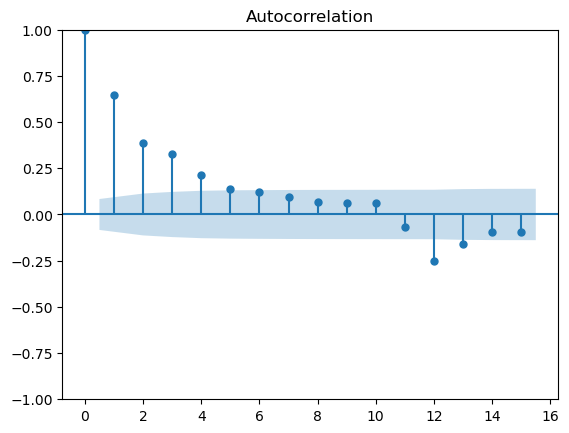

In [20]:
plot_acf(df['Electricty_Consumption_in_TW'].diff(12).dropna() , lags = 15)
plt.show()

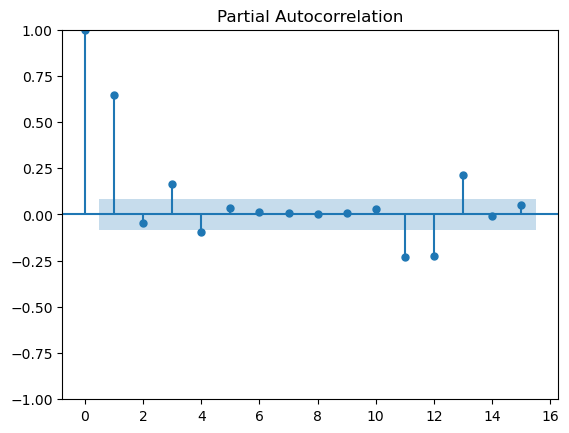

In [21]:
plot_pacf(df['Electricty_Consumption_in_TW'].diff(12).dropna() , lags = 15)
plt.show()

In [22]:
# train-test split

In [23]:
train_size = round(0.8 * len(df))

In [24]:
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

In [25]:
print(train_df.shape)
print(test_df.shape)

(449, 1)
(112, 1)


# Model Building

## Creating a SARIMA model

In [26]:
# Creating a self defined function to find out the optimum values of the Parameters : 

def auto_sarima(timeseries , regressors = None , p = [3] , d  = range(0,3) , q = range(3,6) ,
                P = [0,1] , D = range(0,2) , Q = range(0,2)) : 
    
    # Generating all different combinations of p,d,q 
    pdq = list(itertools.product(p,d,q))
    # Generating all different combinations of P,D,Q
    seasonal_pdq  = [(x[0],x[1],x[2],12) for x in list(itertools.product(P,D,Q))]
    
    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for seasonal_param in seasonal_pdq :
            try:
                temp_model = SARIMAX(endog =  timeseries , exog = regressors , order = param , 
                                     seasonal_order= seasonal_param , enforce_stationarity=False , enforce_invertibility= False
                                    )
                temp_results = temp_model.fit(disp = False)
                print(f"Sarimax{param},{seasonal_param} - AIC : {temp_results.aic}")
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = seasonal_param
                    best_results = temp_results
            except:
                print("unexpected error")
                continue
    print(f"Best Sarimax {best_pdq} X {best_seasonal_pdq} 12 model - AIC : {best_aic}")
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [27]:
# for some reason this model was giving better results

sarima_model  = SARIMAX(train_df , order = (3,0,5) , seasonal_order= (0,1,0,12)).fit()

In [28]:
# Summary of the model

sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:        Electricty_Consumption_in_TW   No. Observations:                  449
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -880.523
Date:                             Mon, 22 Apr 2024   AIC                           1779.047
Time:                                     14:15:57   BIC                           1815.766
Sample:                                 01-01-1973   HQIC                          1793.537
                                      - 05-01-2010                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9411      0.055     17.255      0.000       0.834       1.048
ar.L2         -0.7669      0.062    -12.278      0.000      -0.889      -0.644
ar.L3          0.7037      0.043     16.524      0.000       0.620       0.787
ma.L1         -0.2013      0.068     -2.977      0.003      -0.334      -0.069
ma.L2          0.5406      0.063      8.564      0.000       0.417       0.664
ma.L3         -0.1137      0.072     -1.589      0.112      -0.254       0.027
ma.L4         -0.4242      0.056     -7.559      0.000      -0.534      -0.314
ma.L5          0.1005      0.062      1.616      0.106      -0.021       0.222
sigma2         3.2730      0.168     19.460      0.000       2.943       3.603
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                79.42
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               3.58   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
# Taking out the dates for which we want to make predictions

start_date = test_df.index[0]
end_date = test_df.index[-1]

In [30]:
# Making predictions

test_df['pred'] = sarima_model.predict(start = start_date , end  = end_date)

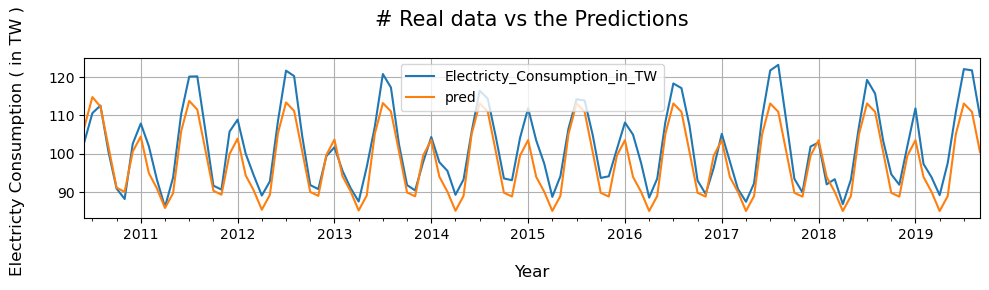

In [31]:
# Plotting Real data and the Predictions

test_df.plot(figsize = (10,3))
plt.ylabel("Electricty Consumption ( in TW ) \n" , fontsize = 12 )
plt.xlabel('\nYear' , fontsize = 12)
plt.title("# Real data vs the Predictions\n" , fontsize  = 15 )
plt.tight_layout()
plt.grid()
plt.show()

<Axes: ylabel='Density'>

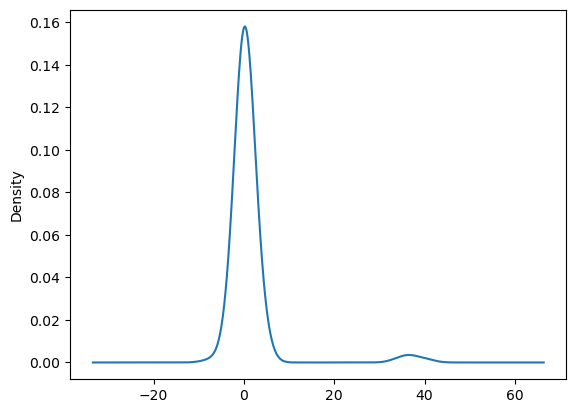

In [32]:
# Generating a kernel density estimation (KDE) plot of the residuals (errors) of our SARIMA model. 

sarima_model.resid.plot(kind = 'kde')

## Model Evaluation

In [33]:
# Mean Absolute Percentage Error (MAPE)

print("Mean Absolute Percentage Error (MAPE)  :" , mean_absolute_percentage_error(test_df['Electricty_Consumption_in_TW'] , test_df['pred']))

Mean Absolute Percentage Error (MAPE)  : 0.039596487240078415


In [34]:
# Mean Absolute Error (MAE)

print("Mean Absolute Error (MAE)  :" , mean_absolute_error(test_df['Electricty_Consumption_in_TW'] , test_df['pred']))

Mean Absolute Error (MAE)  : 4.1229638826411685


## Demand Estimation for next 1-2 years on monthly basis

In [35]:
future_dates = pd.date_range(start = '2019-10-01' , end = '2021-10-01' , freq = 'MS')
future_dates_df = pd.DataFrame(index = future_dates , columns = df.columns)
future_df = pd.concat([df,future_dates_df])

In [36]:
# Doing the final forecasting for the required time perriod

future_df['forecast'] = sarima_model.predict(start = '2019-10-01' , end = '2021-10-01')  

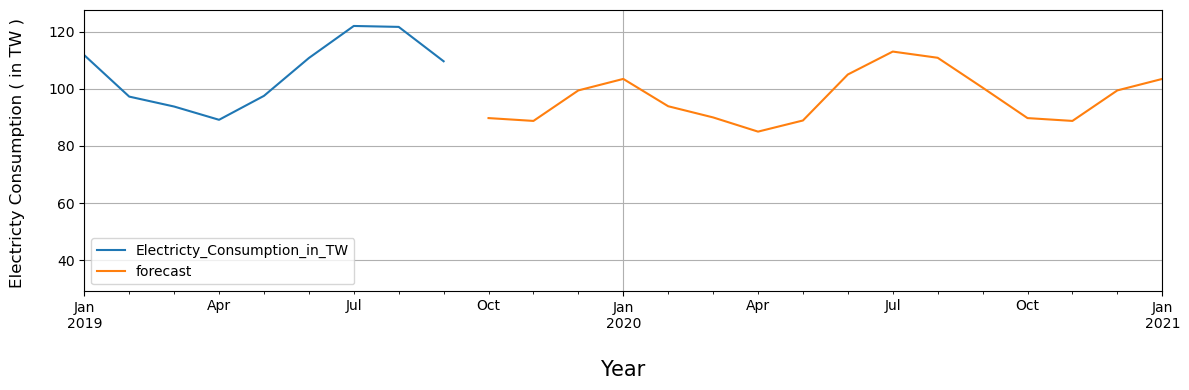

In [37]:
# Plotting the previous years' data and the forecasted data

future_df[future_df.columns].plot(figsize = (12,4), xlim = ('2019' , '2021'))
plt.legend()
plt.ylabel("Electricty Consumption ( in TW ) \n" , fontsize = 12 )
plt.xlabel('\nYear' , fontsize = 15)
plt.tight_layout()
plt.grid()
plt.show()

# The trends and seasonality of the predicted data seems to be in symphony with the previous data